# Educational Attainment by School Demographics
## Soonhyung Kwon, BA Data Science & Economics



Background.

1. The NYCDOE covers all five boroughs in New York City. The City School District of the City of New York is the largest school system in the US, covering more than 1.1 million students in over 1,800 schools.

2. New York City is the most populous city in the United States with a long history of international immigration. Mapping predominant ethnicity by each tract reveals signs of racial divide. For instance, there is a high concentration of the city's Hispanic population in Bronx.

3. While it is generally accepted that educational attainment gap between races have decreased over time, significant differences remain. Asian Americans generally had the highest educational attainment of any race. Persons identifying as Hispanic or Latino had the lowest educational attainment.

4. Therefore, I concluded that New York City is the most appropriate place to test for racial differences in educational attainment in the United States today, and went on to analyze the city's data to search for signs of racial divide in the education sector.

개요

1. 뉴욕 교육국(NYCDOE)은 뉴욕시 내 다섯개의 자치구를 관할합니다. 해당 교육국은 백십만명의 학생과 천팔백개의 학교를 담당하고 있으며, 미국 내 가장 큰 교육기관에 해당합니다.
2. 뉴욕시는 미국 내 인구가 가장 높으며, 긴 인구이동의 역사를 가지고 있는 도시입니다. 또한 지역별로 인구구성이 크게 차이나는 경향이 있습니다. 한 예로 브롱스 지역에는 히스패닉계의 인구율이 높은편 입니다.
3. 미국 내 인종별 교육수준 격차는 과거에 비해 줄었다는 것이 정설이나, 아직까지도 큰 차이가 존재합니다. 아시아계 미국인의 교육수준은 대체로 다른 인종에 비해 높았으며, 히스패닉계의 교육수준이 가장 낮은편 이었습니다. 
4. 따라서 본인은 뉴욕시가 현대 미국의 인종간 교육수준 격차를 관찰하기에 가장 적절한 지역이라고 생각했으며, 해당 프로젝트에서는 뉴욕시의 데이타를 통해 미국 내 인종간 교육수준의 차이를 탐구하고자 했습니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import folium
from folium import plugins

In [3]:
#1. Directory of public high schools in NYC, 2019.
#https://data.cityofnewyork.us/Education/2019-DOE-High-School-Directory/uq7m-95z8/data
hs_directory = pd.read_csv('Data/2019 hs_directory.csv')
hs_directory['DBN'] = hs_directory['dbn']

#2. Data of different class sizes in K-12 schools in NYC, 2010-11.
#https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3
class_size = pd.read_csv('Data/2010-11 class_size.csv')
class_size['DBN'] = class_size.apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)

#3. Data of school demographics in NYC, 2006-12.
#https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j/data
demographics = pd.read_csv('Data/2006-12 demographics.csv')

#4. Data of graduation outcomes for high schools in NYC, 2005-10.
#https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a
graduation = pd.read_csv('Data/2005-10 graduation_outcomes.csv')

#5. Data for AP test scores of high schools in NYC, 2010.
#https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e
ap = pd.read_csv('Data/2010 ap.csv')
ap['% Exams with Scores 3 4 or 5'] = ap['Number of Exams with scores 3 4 or 5'] / ap['Total Exams Taken']
ap = ap.loc[:,['DBN', 'SchoolName', '% Exams with Scores 3 4 or 5']]

#6. Data for SAT test scores of high schools in NYC, 2012.
#https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4
sat = pd.read_csv('Data/2012 sat_results.csv')
sat = sat.replace(r'^s$', np.nan, regex=True)
for section in ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']:
    sat[section] = pd.to_numeric(sat[section], errors='coerce')
sat['total score'] = sat['SAT Critical Reading Avg. Score'] + sat['SAT Math Avg. Score'] + sat['SAT Writing Avg. Score']
sat = sat.loc[:,['DBN', 'SCHOOL NAME', 'total score']]

In [6]:
# schools_map = folium.Map(location=[hs_directory['Latitude'].mean(), hs_directory['Longitude'].mean()], zoom_start=10)
# marker_cluster = folium.plugins.MarkerCluster().add_to(schools_map)
# for name, row in hs_directory.iterrows():
#     folium.Marker([row["Latitude"], row["Longitude"]], popup="{}".format(row["school_name"])).add_to(marker_cluster)
# schools_map

<p><img src="Image/school_distribution.jpg" style="width:1000px"></p>

Depicted above is a map of DOE registered high schools in NYC divided into arbitrary groups determined by the clustering algorithm. Note the high concentration of high schools in central and northern NYC, including populous regions such as Manhattan and Brooklyn. As we'll observe below, higher concentration of schools doesn't always translate to better school performance. In fact, Staten Island was one of the best performing school districts even though it has the least number of schools out of five boroughs.

상단의 지도에는 교육국에 등록되어있는 뉴욕시 내의 모든 고등학교가 클러스터링 방식으로 표기되어 있습니다. 가장 먼저 인구밀도가 높은 도시의 중부와 북부지역에 학교의 개수가 월등히 높은것을 확인할 수 있는데, 하단의 분석자료를 통해 확인할 수 있듯이 해당 지역의 학교 개수와 평균 학업수행능력은 크게 비례하지 않았습니다. 한 예로 스테이튼 아일랜드 지역은 다섯개의 자치구 중 가장 적은 수의 학교가 위치했지만 가장 높은 평균 수행능력을 기록했습니다. 

## Class Size and School Demographics

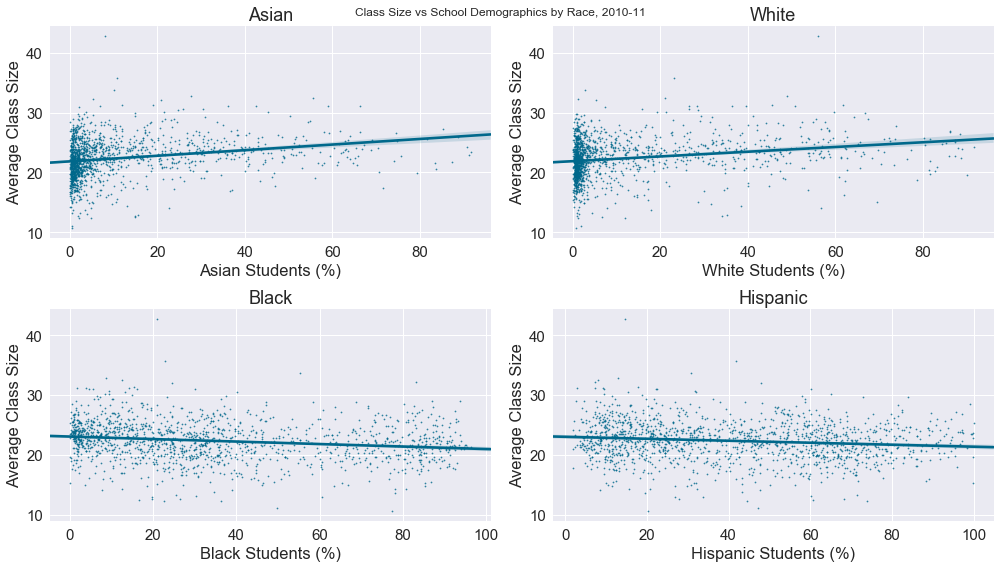

In [54]:
size_per_dbn = class_size.groupby('DBN').agg(np.mean)
demographics_avg = demographics.groupby('DBN').agg(np.mean)
size_demographics = size_per_dbn.merge(demographics_avg, how='inner', on='DBN')

fig = plt.figure(1, figsize=(14, 8))
_ = plt.subplot(221)
_ = sns.regplot(x='asian_per', y='AVERAGE CLASS SIZE', data=size_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Asian Students (%)')
_ = plt.ylabel('Average Class Size')
_ = plt.title('Asian')

_ = plt.subplot(222)
_ = sns.regplot(x='white_per', y='AVERAGE CLASS SIZE', data=size_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('White Students (%)')
_ = plt.ylabel('Average Class Size')
_ = plt.title('White')

_ = plt.subplot(223)
_ = sns.regplot(x='black_per', y='AVERAGE CLASS SIZE', data=size_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Black Students (%)')
_ = plt.ylabel('Average Class Size')
_ = plt.title('Black')

_ = plt.subplot(224)
_ = sns.regplot(x='hispanic_per', y='AVERAGE CLASS SIZE', data=size_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Hispanic Students (%)')
_ = plt.ylabel('Average Class Size')
_ = plt.title('Hispanic')

_ = plt.suptitle('Class Size vs School Demographics by Race, 2010-11')
_ = plt.tight_layout()
_ = plt.savefig('size_demographics.png')

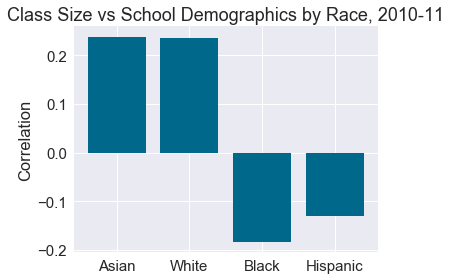

In [55]:
size_corr_list = []
for race in ['asian_per', 'white_per', 'black_per', 'hispanic_per']:
    size_corr_list.append(size_demographics['AVERAGE CLASS SIZE'].corr(size_demographics[race]))

_ = plt.bar(['Asian','White','Black','Hispanic'], size_corr_list, color='#00688B')
_ = plt.ylabel('Correlation')
_ = plt.title('Class Size vs School Demographics by Race, 2010-11')
_ = plt.tight_layout()
_ = plt.savefig('size_demographics_2.png')

Above is a correlation analysis between average class size and demographic profile of every DOE registered high school in the 2010-11 school year. Contrary to what one might expect, class size is positively correlated to higher percentage of Asian and white students, and negatively correlated to Hispanic and black students.

상단에는 뉴욕시 교육국에 등록되어있는 모든 고등학교의 2010-11 학기 수업별 평균 학생 수와 해당 학교 학생들의 인종구성간의 상관관계가 분석되어 있습니다. 예상과는 달리 학교 내 아시안이나 백인 학생의 비율이 높을수록 평균 학생 수 또한 높았고, 학교 내 흑인과 히스패닉 학생의 비율이 높을수록 평균 학생 수가 낮았다는 점을 확인할 수 있습니다.

## Graduation Rate and School Demographics

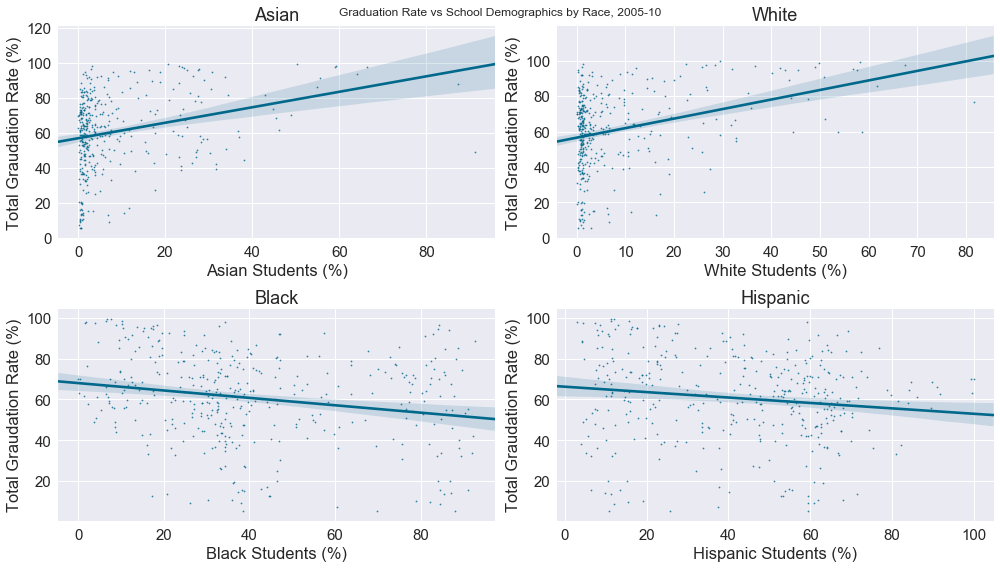

In [56]:
graduation_avg = graduation.groupby('DBN').agg(np.mean)
graduation_dem = graduation_avg.merge(demographics_avg, how='inner', on='DBN')

fig = plt.figure(1, figsize=(14, 8))
_ = plt.subplot(221)
_ = sns.regplot(x='asian_per', y='Total Grads - % of cohort', data=graduation_dem, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Asian Students (%)')
_ = plt.ylabel('Total Graudation Rate (%)')
_ = plt.title('Asian')

_ = plt.subplot(222)
_ = sns.regplot(x='white_per', y='Total Grads - % of cohort', data=graduation_dem, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('White Students (%)')
_ = plt.ylabel('Total Graudation Rate (%)')
_ = plt.title('White')

_ = plt.subplot(223)
_ = sns.regplot(x='black_per', y='Total Grads - % of cohort', data=graduation_dem, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Black Students (%)')
_ = plt.ylabel('Total Graudation Rate (%)')
_ = plt.title('Black')

_ = plt.subplot(224)
_ = sns.regplot(x='hispanic_per', y='Total Grads - % of cohort', data=graduation_dem, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Hispanic Students (%)')
_ = plt.ylabel('Total Graudation Rate (%)')
_ = plt.title('Hispanic')

_ = plt.suptitle('Graduation Rate vs School Demographics by Race, 2005-10')
_ = plt.tight_layout()
_ = plt.savefig('graduation_demographics.png')

Observing the above scatter plots, the linear relationships appear to be a little weaker than they were with the average class size regressions depicted above. One alternative technique is "Locally Weighted Scatterplot Smoothing" or LOWESS, which locally smoothes out the scatter plot to explain the overall trend with a simple line graph. An example can be found below.

상단 네개의 산점도는 학교별 평균 졸업률과 인종구성간의 상관관계를 보여주고 있는데, 앞서 분석한 수업별 평균 학생 수에 비해 직선회귀관계가 불분명한 것을 확인할 수 있습니다. 이에 대한 대안책으로는 LOWESS 그래프가 있는데, 이는 산점도를 한개의 선으로 요약함으로서 선 그래프를 통해 전체적인 동향을 확인할 수 있도록 도와주는 역할을 합니다. 하단에서 차례대로 평균 졸업률과 자퇴율에 관한 해당 그래프를 확인할 수 있습니다.

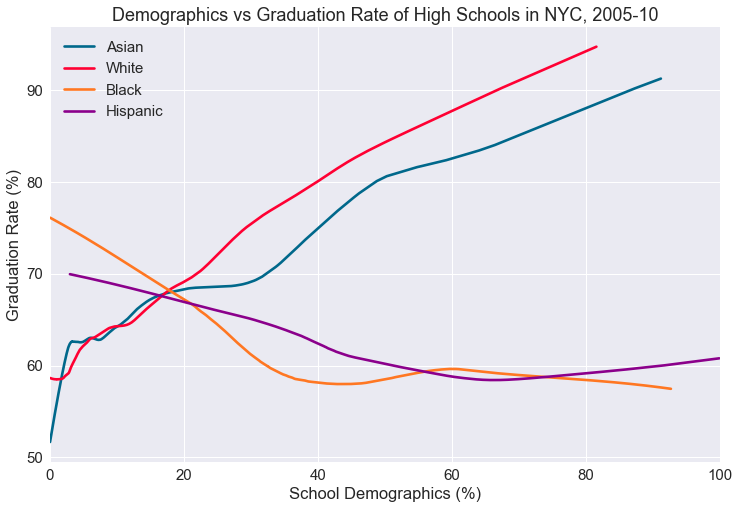

In [57]:
_ = sns.set(font_scale=1.5)
_ = sns.regplot(x='asian_per', y='Total Grads - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#00688B')
_ = sns.regplot(x='white_per', y='Total Grads - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#ff0033')
_ = sns.regplot(x='black_per', y='Total Grads - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#FF7722')
_ = sns.regplot(x='hispanic_per', y='Total Grads - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#8B008B')
_ = plt.xlim(0, 100)
_ = plt.legend(['Asian', 'White', 'Black', 'Hispanic'])

_ = plt.xlabel('School Demographics (%)')
_ = plt.ylabel('Graduation Rate (%)')
_ = plt.title('Demographics vs Graduation Rate of High Schools in NYC, 2005-10')

_ = plt.gcf().set_size_inches(12, 8)
_ = plt.savefig('demographics_graduation.png')

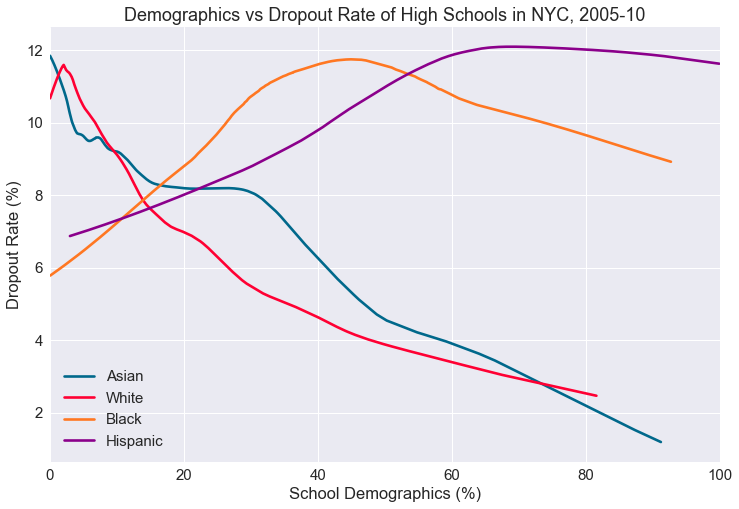

In [58]:
_ = sns.regplot(x='asian_per', y='Dropped Out - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#00688B')
_ = sns.regplot(x='white_per', y='Dropped Out - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#ff0033')
_ = sns.regplot(x='black_per', y='Dropped Out - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#FF7722')
_ = sns.regplot(x='hispanic_per', y='Dropped Out - % of cohort', data=graduation_dem, scatter=False, lowess=True, color='#8B008B')
_ = plt.xlim(0, 100)
_ = plt.legend(['Asian', 'White', 'Black', 'Hispanic'])

_ = plt.xlabel('School Demographics (%)')
_ = plt.ylabel('Dropout Rate (%)')
_ = plt.title('Demographics vs Dropout Rate of High Schools in NYC, 2005-10')

_ = plt.gcf().set_size_inches(12, 8)
_ = plt.savefig('demographics_dropout.png')

Above are LOWESS estimations of the relationship between school demographics and high school graduation rate, and school demographics and high school dropout rate, respectively. Note how the two lines corresponding to Asian and white students move in the opposite direction from the other two lines corresponding to Hispanic and black students in both graphs. Higher percentage of Asian and white students was positively correlated with a higher graduation rate and a lower dropout rate, while the opposite was the case with Hispanic and black students. 

### Standardized Test Scores and School Demographics

In [67]:
def map_by_district(df, col, legend):
    temp_df = df.loc[:, [col, 'DBN']]
    temp_df['school_dist'] = temp_df['DBN'].apply(lambda x: x[:2])
    temp_df['school_dist'] = pd.to_numeric(temp_df['school_dist'], errors='coerce').apply(str)
#     print(temp_df.loc[temp_df['school_dist']=='1'])
    temp_df = temp_df.loc[:, ['school_dist', col]].groupby('school_dist').mean()
    temp_df.reset_index(level=0, inplace=True)
    districts = folium.Map(location=[hs_directory['Latitude'].mean(), hs_directory['Longitude'].mean()], zoom_start=10)
    folium.Choropleth(
        #https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj
        geo_data='Data/nysd.geojson',
        data=temp_df,
        columns=['school_dist', col],
        key_on='feature.properties.school_dist',
        fill_color='YlGnBu',
        fill_opacity=0.8,
        line_opacity=1,
        legend_name = legend
    ).add_to(districts)
    return districts

In [5]:
# map_by_district(sat, 'total score', 'SAT Score Distribution')

<img src="Image/sat_score.jpg" style="width:1000px">

Above is a map of average SAT scores by school district. Before diving directly into corrlation analysis, it is helpful to see a visual representation of how the demographic profile of a school region translates to a higher average of standardized test scores. Take note of the high SAT scores in parts of Queens, Brooklyn and the Staten Island. 

In [1]:
# map_by_district(demographics, 'asian_per', '% Asian Students')

In [2]:
# map_by_district(demographics, 'white_per', '% White Students')

In [4]:
# map_by_district(demographics, 'black_per', '% Black Students')

In [3]:
# map_by_district(demographics, 'hispanic_per', '% Hispanic Students')

<img src="Image/white.jpg" style="width:1000px">
(percentage of white students by school district)
<img src="Image/asian.jpg" style="width:1000px">
(percentage of asian students by school district)
<img src="Image/black.jpg" style="width:1000px">
(percentage of black students by school district)
<img src="Image/hispanic.jpg" style="width:1000px">
(percentage of hispanic students by school district)

Although parts of Queens and the Staten Island seem to have a larger percentage of Asian and white students, it isn't entirely clear how the demographic profile of each district corresponds to standardized test score results. Below is a correlation analysis of SAT and AP score results, regressed against the percentage of each of four demographic groups we have been discussing.

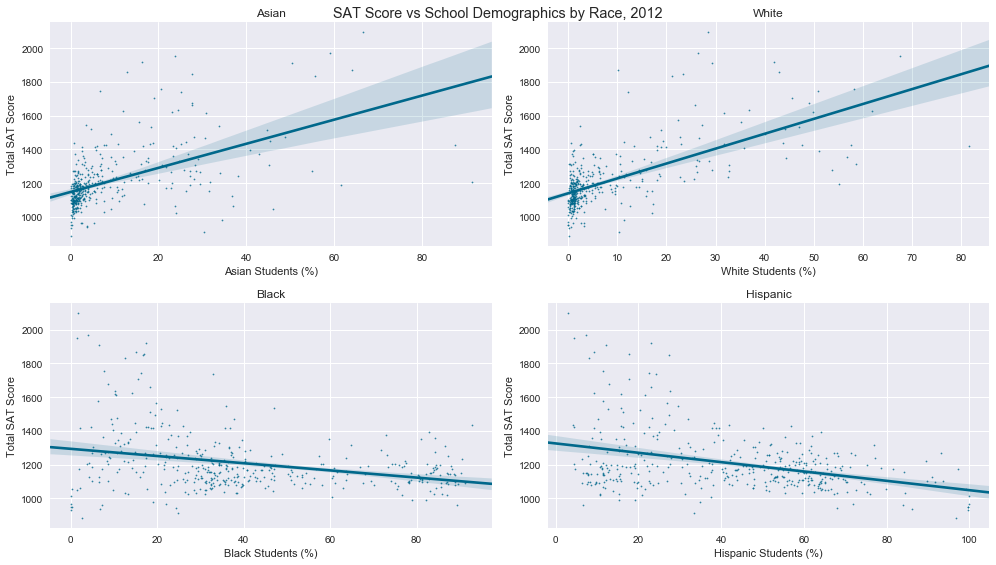

In [74]:
sat_and_demographics = sat.merge(demographics_avg, how='inner', on='DBN')
ap_and_demographics = ap.merge(demographics_avg, how='inner', on='DBN')

_ = sns.set(font_scale=1)
fig = plt.figure(1, figsize=(14, 8))

_ = plt.subplot(221)
_ = sns.regplot(x='asian_per', y='total score', data=sat_and_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Asian Students (%)')
_ = plt.ylabel('Total SAT Score')
_ = plt.title('Asian')

_ = plt.subplot(222)
_ = sns.regplot(x='white_per', y='total score', data=sat_and_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('White Students (%)')
_ = plt.ylabel('Total SAT Score')
_ = plt.title('White')

_ = plt.subplot(223)
_ = sns.regplot(x='black_per', y='total score', data=sat_and_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Black Students (%)')
_ = plt.ylabel('Total SAT Score')
_ = plt.title('Black')

_ = plt.subplot(224)
_ = sns.regplot(x='hispanic_per', y='total score', data=sat_and_demographics, color='#00688B', scatter_kws={'s':3})
_ = plt.xlabel('Hispanic Students (%)')
_ = plt.ylabel('Total SAT Score')
_ = plt.title('Hispanic')

_ = plt.suptitle('SAT Score vs School Demographics by Race, 2012')
_ = plt.tight_layout()
_ = plt.savefig('sat_demographics.png')

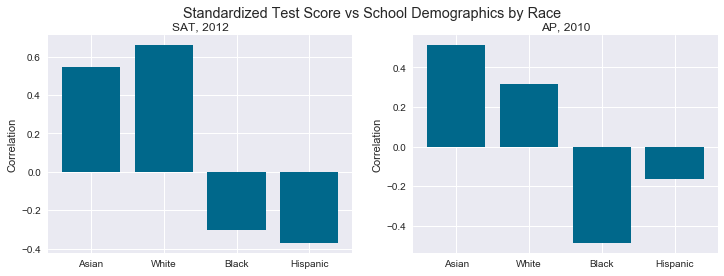

In [76]:
sat_corr_list = []
for race in ['asian_per', 'white_per', 'black_per', 'hispanic_per']:
    sat_corr_list.append(sat_and_demographics['total score'].corr(sat_and_demographics[race]))
    
ap_corr_list = []
for race in ['asian_per', 'white_per', 'black_per', 'hispanic_per']:
    ap_corr_list.append(ap_and_demographics['% Exams with Scores 3 4 or 5'].corr(ap_and_demographics[race]))

fig = plt.figure(1, figsize=(12, 4))    

_ = plt.subplot(121)
_ = plt.bar(['Asian','White','Black','Hispanic'], sat_corr_list, color='#00688B')
_ = plt.title('SAT, 2012')
_ = plt.ylabel('Correlation')

_ = plt.subplot(122)
_ = plt.bar(['Asian','White','Black','Hispanic'], ap_corr_list, color='#00688B')
_ = plt.title('AP, 2010')
_ = plt.ylabel('Correlation')

_ = plt.suptitle('Standardized Test Score vs School Demographics by Race')
_ = plt.savefig('sat_demographics_2.png')

Again, we observe a strong correlation between higher standardized test scores and a higher ratio of Asian and white students, while the opposite holds with a lower ratio of Hispanic and black students. Note that the relationship appears to be especially strong with the overall SAT scores, which has a direct effect on the college admissions process. 